# Simple Linear Regression

In this assignment, we will use 'TV advertising' to predict 'sales' by using a simple regression model.



## Preparations
Including import libraries, dataset and data cleaning, data visualization
### Importing libraries and dataset.

In [1]:
#Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
advertising = pd.DataFrame(pd.read_csv("../../dataset/advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Data Inspection

In [11]:
advertising.shape

(200, 4)

In [12]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Data Cleaning

In [15]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

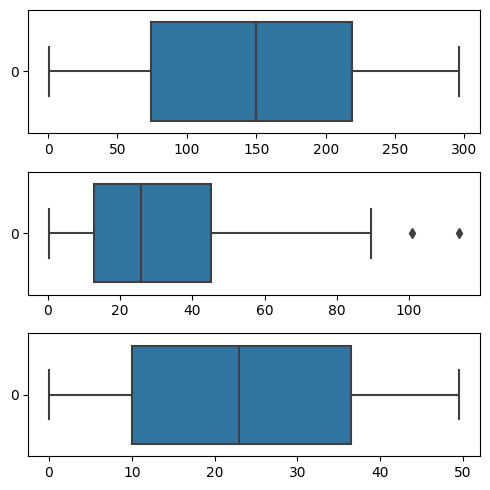

In [22]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], orient='h',ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], orient='h',ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], orient='h',ax = axs[2])
plt.tight_layout()

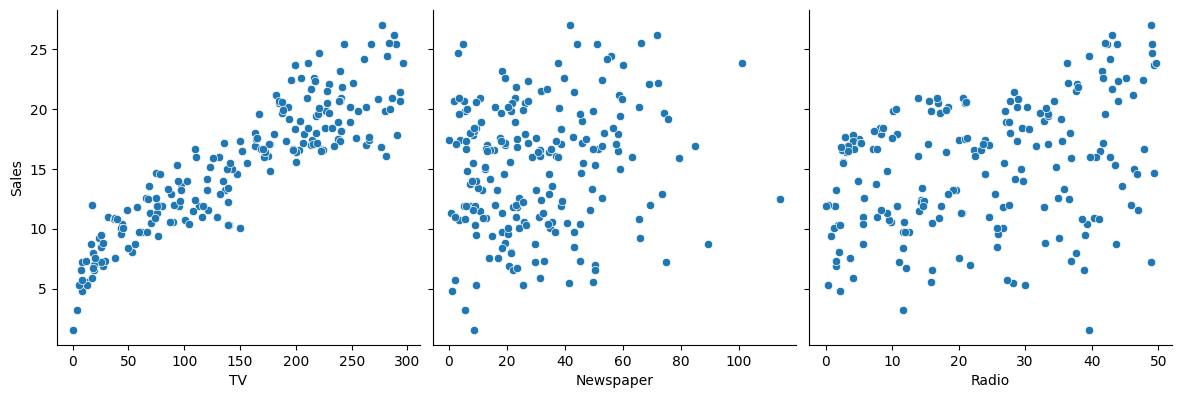

In [25]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

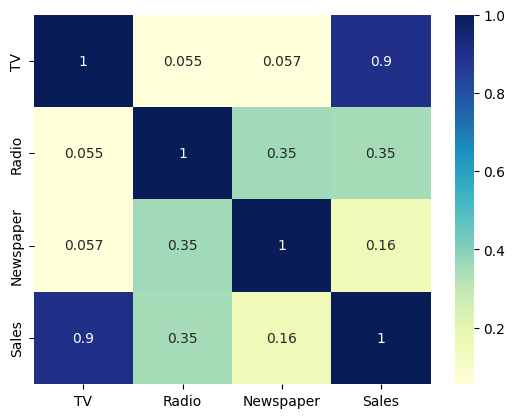

In [26]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

## Model Building

In this section, you will need to fill in some code to help train the linear regression model, and there will be instructions and hints where you need to fill in.

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [27]:
X = advertising['TV']
y = advertising['Sales']

### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [44]:
from sklearn.model_selection import train_test_split
___, ___, ___, ___ = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [31]:
assert X_train.iloc[0] == 213.4
assert X_train.iloc[1] == 151.5
assert X_train.iloc[2] == 205.0
assert X_train.iloc[3] == 142.9
assert X_train.iloc[4] == 134.3

In [32]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [33]:
assert y_train.iloc[0] == 17.0
assert y_train.iloc[1] == 16.5
assert y_train.iloc[2] == 22.6
assert y_train.iloc[3] == 15.0
assert y_train.iloc[4] == 14.0

In [45]:
# Fitting Simple Linear Regression to the Training set
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
# Predicting the Salary for the Test values
y_pred = regressor.predict(X_test)

Visualize training model and testing model

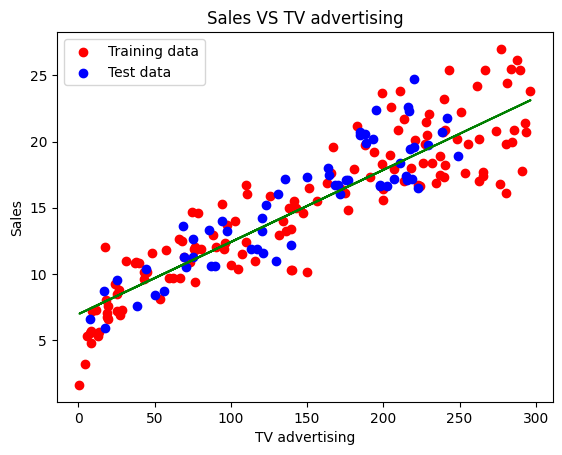

In [48]:
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_train, regressor.predict(X_train), color='green')
plt.title('Sales VS TV advertising')
plt.xlabel('TV advertising')
plt.ylabel('Sales')
plt.legend()  
plt.show()

## Model Evaluation

First, We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [62]:
# We need to calculate the difference between the predicted value and the true value.
# Being careful to distinguish between the training set and the prediction set!!!

gap = (___ - ___) 

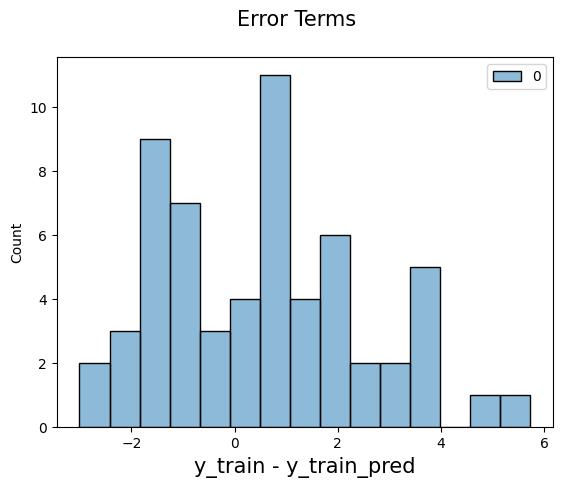

In [63]:
fig = plt.figure()
sns.histplot(gap, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

Looking for patterns in the residuals

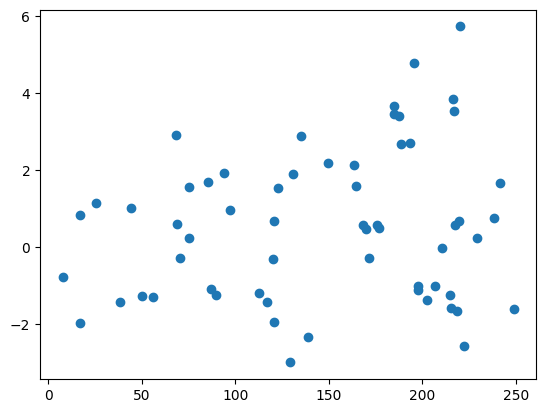

In [65]:
plt.scatter(X_test,gap)
plt.show()

Second, Calculate MSE and RMSE, these metrics help us evalaute the performance of linear regression model.

In [93]:
from sklearn.metrics import mean_squared_error

# calculate Mean square error
mse = mean_squared_error(___,___)
print(f"Mean error: {mse:3.3} ")

# calculate the mean square error as a percentage of the mean predicted value
mse_per = ___/np.___(y_pred)
print(f"Mean error percentage: {mse_per:3.3}%")

# calculate RMSE
rmse = np.___(mean_squared_error(___, ___))
print(f"Mean error: {rmse:3.3}")

Mean error: 4.08 
Mean error percentage: 27.4%
Mean error: 2.02


In [92]:
assert mse == 4.077556371826948
assert mse_per == 0.27395402104113163
assert rmse == 2.019296008966231

Third, calculate the R-squared( coefficient of determination) on the test set.

In [97]:
from sklearn.metrics import r2_score
# Please enter the calculation method of r2_score, tips: choosing from y_train, y_test, y_pred
r_squared = r2_score(___, ___)
r_squared

0.7921031601245662

In [95]:
assert r_squared == 0.7921031601245662

## Acknowledgments

Thanks to [Ashish](https://www.kaggle.com/ashydv) for creating the open-source course [Simple Linear Regression](https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/notebook). It inspires the majority of the content in this chapter.